In [1]:
import pandas as pd
data = pd.read_csv("Food_Delivery_Time_Prediction.csv")
data.head()

Order_ID       Customer_Location     Restaurant_Location  Distance  \
0  ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1  ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2  ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3  ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4  ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   

  Weather_Conditions Traffic_Conditions  Delivery_Person_Experience  \
0              Rainy             Medium                           4   
1             Cloudy             Medium                           8   
2              Snowy             Medium                           9   
3             Cloudy                Low                           2   
4              Rainy               High                           6   

  Order_Priority Order_Time Vehicle_Type  Restaurant_Rating  Customer_Rating  \
0         Medium  Afternoon          Car                4.1              3.0   
1            Low      Night          Car                4.5              4.2   
2           High      Night         Bike                3.3              3.4   
3         Medium    Evening         Bike                3.2              3.7   
4            Low      Night         Bike                3.5              2.8   

   Delivery_Time  Order_Cost  Tip_Amount  
0          26.22     1321.10       81.54  
1          62.61      152.21       29.02  
2          48.43     1644.38       64.17  
3         111.63      541.25       79.23  
4          32.38      619.81        2.34

In [3]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Weather_Conditions Traffic_Conditions Vehicle_Type
data['Weather_Conditions']= label.fit_transform(data['Weather_Conditions'])
data['Traffic_Conditions'] = label.fit_transform(data['Traffic_Conditions'])
data['Vehicle_Type'] = label.fit_transform(data['Vehicle_Type'])
data

Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)      1.57   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)     21.32   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)      6.95   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)     13.79   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)      6.72   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)     23.82   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)      6.09   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)     20.61   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)     24.06   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)      9.18   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1                     0                   2                           8   
2                     2                   2                           9   
3                     0                   1                           2   
4                     1                   0                           6   
..                  ...                 ...                         ...   
195                   0                   0                           8   
196                   2                   2                           8   
197                   2                   0                           4   
198                   1                   0                           9   
199                   2                   1                           2   

    Order_Priority Order_Time  Vehicle_Type  Restaurant_Rating  \
0           Medium  Afternoon             2                4.1   
1              Low      Night             2                4.5   
2             High      Night             1                3.3   
3           Medium    Evening             1                3.2   
4              Low      Night             1                3.5   
..             ...        ...           ...                ...   
195         Medium      Night             1                4.7   
196            Low      Night             0                3.0   
197         Medium  Afternoon             1                2.9   
198            Low      Night             2                3.9   
199            Low    Morning             1                4.6   

     Customer_Rating  Delivery_Time  Order_Cost  Tip_Amount  
0                3.0          26.22     1321.10       81.54  
1                4.2          62.61      152.21       29.02  
2                3.4          48.43     1644.38       64.17  
3                3.7         111.63      541.25       79.23  
4                2.8          32.38      619.81        2.34  
..               ...            ...         ...         ...  
195              4.0          50.39     1432.26       66.34  
196              3.6          90.54     1720.25       40.27  
197              3.4          73.20     1356.58        5.10  
198              4.8          53.94      354.39       85.25  
199              3.2          78.58      323.73       48.91  

[200 rows x 15 columns]

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Distance', 'Delivery_Time']] = scaler.fit_transform(data[['Distance', 'Delivery_Time']])


In [7]:
data['cust_lat'] = data['Customer_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [9]:
data['cust_long'] = data['Customer_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [11]:
data['rest_lat'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[0].astype(float)


In [13]:
data['rest_long'] = data['Restaurant_Location'].str.strip("()").str.split(",").str[1].astype(float)


In [ ]:
# Convert latitude and longitude columns to float


In [15]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])  # Convert degrees to radians

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c  # Distance in km

data['distance_km'] = data.apply(lambda row: haversine(row['cust_lat'], row['cust_long'], row['rest_lat'], row['rest_long']), axis=1)


In [24]:

data["Delivery_Time"].dtype

dtype('float64')

In [26]:
print(data["Delivery_Time"].isna().sum())  # Count NaN values


0


In [129]:
data["Delivery_Time"].max()

1.0

In [131]:
data["Delivery_Time"].min()

0.0

In [56]:
import numpy as np
mean_value = data['Delivery_status'].mean()

data["Delivery_status"] = np.where(data["Delivery_Time"] >mean_value, 1,0)
data


Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)  0.955701   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)  0.228466   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)  0.824036   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)  0.965546   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)  0.355209   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1                     0                   2                           8   
2                     2                   2                           9   
3                     0                   1                           2   
4                     1                   0                           6   
..                  ...                 ...                         ...   
195                   0                   0                           8   
196                   2                   2                           8   
197                   2                   0                           4   
198                   1                   0                           9   
199                   2                   1                           2   

     Order_Priority Order_Time  Vehicle_Type  ...  Order_Cost  Tip_Amount  \
0                 2  Afternoon             2  ...     1321.10       81.54   
1                 1      Night             2  ...      152.21       29.02   
2                 0      Night             1  ...     1644.38       64.17   
3                 2    Evening             1  ...      541.25       79.23   
4                 1      Night             1  ...      619.81        2.34   
..              ...        ...           ...  ...         ...         ...   
195               2      Night             1  ...     1432.26       66.34   
196               1      Night             0  ...     1720.25       40.27   
197               2  Afternoon             1  ...     1356.58        5.10   
198               1      Night             2  ...      354.39       85.25   
199               1    Morning             1  ...      323.73       48.91   

      cust_lat  cust_long   rest_lat  rest_long  distance_km  Delivery_status  \
0    17.030479  79.743077  12.358515  85.100083   775.651198                0   
1    15.398319  86.639122  14.174874  77.025606  1042.385597                0   
2    15.687342  83.888808  19.594748  82.048482   476.220706                0   
3    20.415599  78.046984  16.915906  78.278698   389.912629                1   
4    14.786904  78.706532  15.206038  86.203182   806.505886                0   
..         ...        ...        ...        ...          ...              ...   
195  17.910045  81.561990  18.098924  87.896124   670.130652                0   
196  21.664590  82.226635  16.892341  80.554716   558.891202                1   
197  14.575401  82.556410  13.625369  82.418092   106.686689                0   
198  12.094497  82.893369  19.135509  86.659978   880.580093                0   
199  19.360304  84.132424  20.941636  77.013340   763.581776                0   

     Delivery_Score  Delivery_Status  
0          0.172272                1  
1          0.000000                0  
2          0.000000                0  
3          0.000000                0  
4          0.000000                0  
..              ...              ...  
195        0.000000                0  
196 

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 🔹 Features (X) and Target (y)
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Gaussian Naïve Bayes Model
gnb = GaussianNB(var_smoothing=1e-8)
gnb.fit(X_train, y_train)


# 🔹 Predictions
y_pred = gnb.predict(X_test)
threshold = 0.2
y_pred = np.where(y_pred > threshold, 1, 0)
# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 🔹 Display Results
print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

🔹 Accuracy: 0.97

🔹 Confusion Matrix:
[[27  0]
 [ 1 12]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



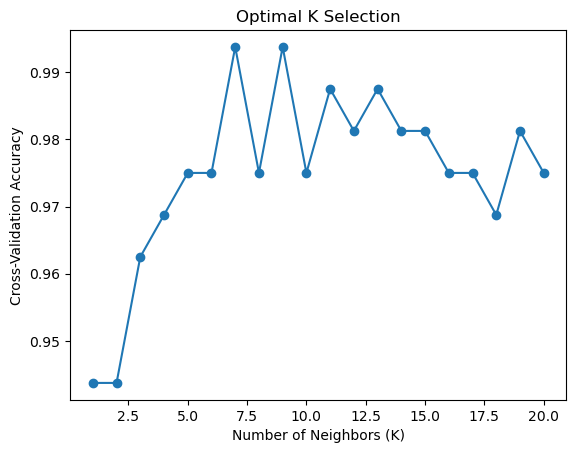

Best K: 7
🔹 Accuracy: 0.97

🔹 Confusion Matrix:
[[27  0]
 [ 1 12]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold CV
    cv_scores.append(scores.mean())

# 🔹 Plot Cross-Validation Results
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Optimal K Selection')
plt.show()

# 🔹 Select the best K (highest accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K: {best_k}")

# 🔹 Train KNN Classifier with Best K
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)

# 🔹 Predictions
y_pred = knn.predict(X_test)

# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 🔹 Display Results
print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

🔹 Accuracy: 0.97

🔹 Confusion Matrix:
[[26  1]
 [ 0 13]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.93      1.00      0.96        13

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



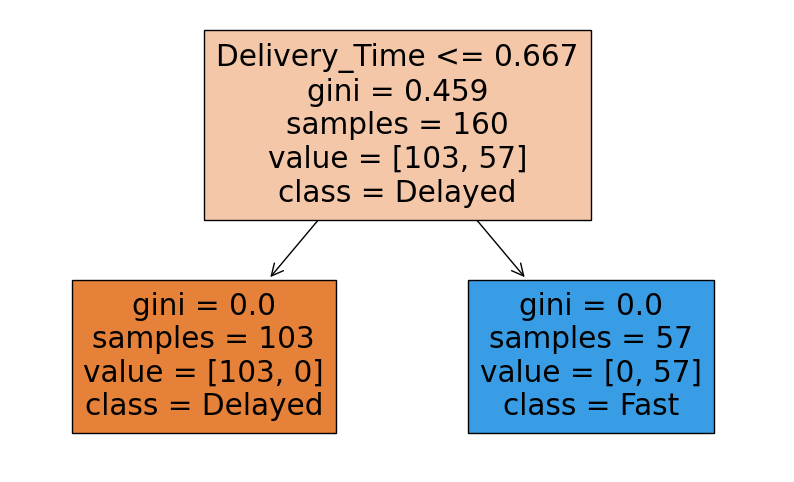

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# 🔹 Features (X) and Target (y)
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train a Basic Decision Tree
tree_clf = DecisionTreeClassifier(min_samples_split=10)
tree_clf.fit(X_train, y_train)

# 🔹 Predictions
y_pred = tree_clf.predict(X_test)

# 🔹 Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"🔹 Accuracy: {accuracy:.2f}")
print("\n🔹 Confusion Matrix:")
print(conf_matrix)
print("\n🔹 Classification Report:")
print(report)

# 🔹 Visualize Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, feature_names=X.columns, class_names=["Delayed", "Fast"], filled=True)
plt.show()



🔹 Naïve Bayes Performance:
Accuracy: 0.97
Confusion Matrix:
[[27  0]
 [ 1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40


🔹 KNN Performance:
Accuracy: 0.97
Confusion Matrix:
[[27  0]
 [ 1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.92      0.96        13

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40


🔹 Decision Tree Performance:
Accuracy: 0.97
Confusion Matrix:
[[26  1]
 [ 0 13]]
Classification Report:
              precision    recall  f1-score

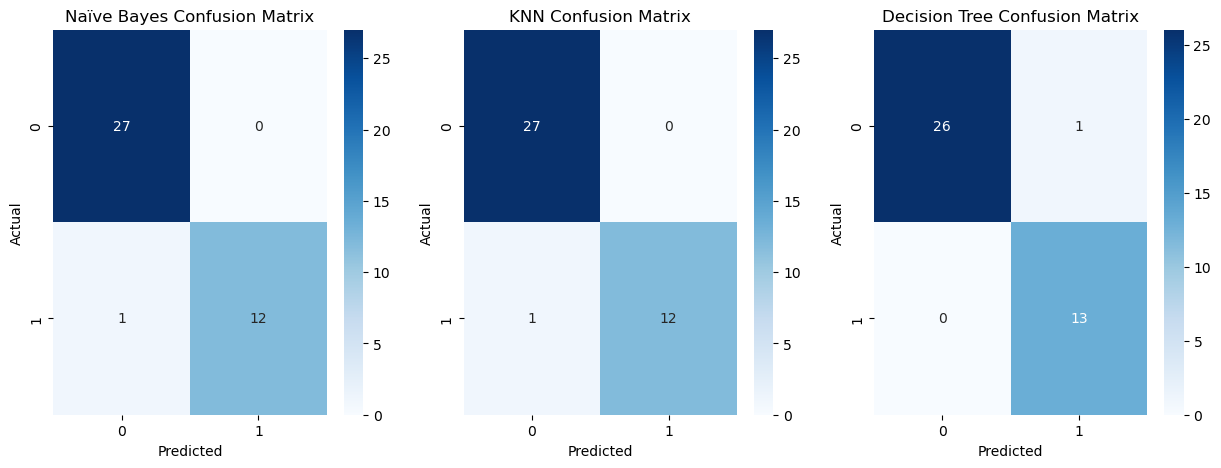

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 🔹 Sample Data


# 🔹 Features & Target
X = data[['Delivery_Time', 'Distance']]
y = data['Delivery_status']

# 🔹 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Standardization (for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Model Initialization
models = {
    "Naïve Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42)
}

# 🔹 Dictionary to Store Results
results = {}

# 🔹 Train, Predict, and Evaluate
for name, model in models.items():
    if name == "KNN":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {"accuracy": acc, "conf_matrix": cm, "report": report}

    print(f"\n🔹 {name} Performance:")
    print(f"Accuracy: {acc:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, res) in enumerate(results.items()):
    sns.heatmap(res["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.show()


In [27]:
data

Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)  0.955701   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)  0.228466   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)  0.824036   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)  0.965546   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)  0.355209   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1                     0                   2                           8   
2                     2                   2                           9   
3                     0                   1                           2   
4                     1                   0                           6   
..                  ...                 ...                         ...   
195                   0                   0                           8   
196                   2                   2                           8   
197                   2                   0                           4   
198                   1                   0                           9   
199                   2                   1                           2   

    Order_Priority Order_Time  Vehicle_Type  ...  Customer_Rating  \
0           Medium  Afternoon             2  ...              3.0   
1              Low      Night             2  ...              4.2   
2             High      Night             1  ...              3.4   
3           Medium    Evening             1  ...              3.7   
4              Low      Night             1  ...              2.8   
..             ...        ...           ...  ...              ...   
195         Medium      Night             1  ...              4.0   
196            Low      Night             0  ...              3.6   
197         Medium  Afternoon             1  ...              3.4   
198            Low      Night             2  ...              4.8   
199            Low    Morning             1  ...              3.2   

     Delivery_Time  Order_Cost  Tip_Amount   cust_lat  cust_long   rest_lat  \
0         0.105228     1321.10       81.54  17.030479  79.743077  12.358515   
1         0.453658      152.21       29.02  15.398319  86.639122  14.174874   
2         0.317886     1644.38       64.17  15.687342  83.888808  19.594748   
3         0.923018      541.25       79.23  20.415599  78.046984  16.915906   
4         0.164209      619.81        2.34  14.786904  78.706532  15.206038   
..             ...         ...         ...        ...        ...        ...   
195       0.336653     1432.26       66.34  17.910045  81.561990  18.098924   
196       0.721084     1720.25       40.27  21.664590  82.226635  16.892341   
197       0.555056     1356.58        5.10  14.575401  82.556410  13.625369   
198       0.370643      354.39       85.25  12.094497  82.893369  19.135509   
199       0.606568      323.73       48.91  19.360304  84.132424  20.941636   

     rest_long  distance_km  Delivery_status  
0    85.100083   775.651198                0  
1    77.025606  1042.385597                0  
2    82.048482   476.220706                0  
3    78.278698   389.912629                1  
4    86.203182   806.505886                0  
..         ...          ...              ...  
195  87.896124   670.130652                0  
196  80.554716   558.891202                1  
197  82.41809

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
# Weather_Conditions Traffic_Conditions Vehicle_Type
data['Order_Priority']= label.fit_transform(data['Order_Priority'])
data

Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)  0.955701   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)  0.228466   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)  0.824036   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)  0.965546   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)  0.355209   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1                     0                   2                           8   
2                     2                   2                           9   
3                     0                   1                           2   
4                     1                   0                           6   
..                  ...                 ...                         ...   
195                   0                   0                           8   
196                   2                   2                           8   
197                   2                   0                           4   
198                   1                   0                           9   
199                   2                   1                           2   

     Order_Priority Order_Time  Vehicle_Type  ...  Customer_Rating  \
0                 2  Afternoon             2  ...              3.0   
1                 1      Night             2  ...              4.2   
2                 0      Night             1  ...              3.4   
3                 2    Evening             1  ...              3.7   
4                 1      Night             1  ...              2.8   
..              ...        ...           ...  ...              ...   
195               2      Night             1  ...              4.0   
196               1      Night             0  ...              3.6   
197               2  Afternoon             1  ...              3.4   
198               1      Night             2  ...              4.8   
199               1    Morning             1  ...              3.2   

     Delivery_Time  Order_Cost  Tip_Amount   cust_lat  cust_long   rest_lat  \
0         0.105228     1321.10       81.54  17.030479  79.743077  12.358515   
1         0.453658      152.21       29.02  15.398319  86.639122  14.174874   
2         0.317886     1644.38       64.17  15.687342  83.888808  19.594748   
3         0.923018      541.25       79.23  20.415599  78.046984  16.915906   
4         0.164209      619.81        2.34  14.786904  78.706532  15.206038   
..             ...         ...         ...        ...        ...        ...   
195       0.336653     1432.26       66.34  17.910045  81.561990  18.098924   
196       0.721084     1720.25       40.27  21.664590  82.226635  16.892341   
197       0.555056     1356.58        5.10  14.575401  82.556410  13.625369   
198       0.370643      354.39       85.25  12.094497  82.893369  19.135509   
199       0.606568      323.73       48.91  19.360304  84.132424  20.941636   

     rest_long  distance_km  Delivery_status  
0    85.100083   775.651198                0  
1    77.025606  1042.385597                0  
2    82.048482   476.220706                0  
3    78.278698   389.912629                1  
4    86.203182   806.505886                0  
..         ...          ...              ...  
195  87.896124   670.130652                0  
196  80.554716   558.891202                1  
1

In [ ]:
conda install -c conda-forge tensorflow


Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: | 

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Compute Delivery Score as a product of input features
data["Delivery_Score"] = data["Distance"] * data["Traffic_Conditions"] * data["Weather_Conditions"] * data["Order_Priority"]

# Categorize Delivery Status based on the median of Delivery_Score
median_score = np.median(data["Delivery_Score"])
data["Delivery_Status"] = data["Delivery_Score"].apply(lambda x: 1 if x > median_score else 0)  # 1 = Delayed, 0 = Fast
data


Order_ID       Customer_Location     Restaurant_Location  Distance  \
0    ORD0001  (17.030479, 79.743077)  (12.358515, 85.100083)  0.043068   
1    ORD0002  (15.398319, 86.639122)  (14.174874, 77.025606)  0.853158   
2    ORD0003  (15.687342, 83.888808)  (19.594748, 82.048482)  0.263741   
3    ORD0004  (20.415599, 78.046984)  (16.915906, 78.278698)  0.544299   
4    ORD0005  (14.786904, 78.706532)  (15.206038, 86.203182)  0.254307   
..       ...                     ...                     ...       ...   
195  ORD0196   (17.910045, 81.56199)  (18.098924, 87.896124)  0.955701   
196  ORD0197   (21.66459, 82.226635)  (16.892341, 80.554716)  0.228466   
197  ORD0198   (14.575401, 82.55641)  (13.625369, 82.418092)  0.824036   
198  ORD0199  (12.094497, 82.893369)  (19.135509, 86.659978)  0.965546   
199  ORD0200  (19.360304, 84.132424)   (20.941636, 77.01334)  0.355209   

     Weather_Conditions  Traffic_Conditions  Delivery_Person_Experience  \
0                     1                   2                           4   
1                     0                   2                           8   
2                     2                   2                           9   
3                     0                   1                           2   
4                     1                   0                           6   
..                  ...                 ...                         ...   
195                   0                   0                           8   
196                   2                   2                           8   
197                   2                   0                           4   
198                   1                   0                           9   
199                   2                   1                           2   

     Order_Priority Order_Time  Vehicle_Type  ...  Order_Cost  Tip_Amount  \
0                 2  Afternoon             2  ...     1321.10       81.54   
1                 1      Night             2  ...      152.21       29.02   
2                 0      Night             1  ...     1644.38       64.17   
3                 2    Evening             1  ...      541.25       79.23   
4                 1      Night             1  ...      619.81        2.34   
..              ...        ...           ...  ...         ...         ...   
195               2      Night             1  ...     1432.26       66.34   
196               1      Night             0  ...     1720.25       40.27   
197               2  Afternoon             1  ...     1356.58        5.10   
198               1      Night             2  ...      354.39       85.25   
199               1    Morning             1  ...      323.73       48.91   

      cust_lat  cust_long   rest_lat  rest_long  distance_km  Delivery_status  \
0    17.030479  79.743077  12.358515  85.100083   775.651198                0   
1    15.398319  86.639122  14.174874  77.025606  1042.385597                0   
2    15.687342  83.888808  19.594748  82.048482   476.220706                0   
3    20.415599  78.046984  16.915906  78.278698   389.912629                1   
4    14.786904  78.706532  15.206038  86.203182   806.505886                0   
..         ...        ...        ...        ...          ...              ...   
195  17.910045  81.561990  18.098924  87.896124   670.130652                0   
196  21.664590  82.226635  16.892341  80.554716   558.891202                1   
197  14.575401  82.556410  13.625369  82.418092   106.686689                0   
198  12.094497  82.893369  19.135509  86.659978   880.580093                0   
199  19.360304  84.132424  20.941636  77.013340   763.581776                0   

     Delivery_Score  Delivery_Status  
0          0.172272                1  
1          0.000000                0  
2          0.000000                0  
3          0.000000                0  
4          0.000000                0  
..              ...              ...  
195        0.000000                0  
196 

In [78]:

# Splitting features and target
X = data[["Distance","Traffic_Conditions","Weather_Conditions","Order_Priority"]]
y = data["Delivery_Status"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Neural Network model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(8, activation='relu'),                                   # Hidden layer 2
    Dense(1, activation='sigmoid')                                 # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=2, verbose=1, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Apply threshold to classify as Fast (0) or Delayed (1)
y_pred = (y_pred_prob > 0.5).astype(int)





Epoch 1/50


/home/ubuntu/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6586 - loss: 0.5698 - val_accuracy: 0.7250 - val_loss: 0.5514
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.5358 - val_accuracy: 0.7500 - val_loss: 0.4944
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6879 - loss: 0.4860 - val_accuracy: 0.7500 - val_loss: 0.4431
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 0.4631 - val_accuracy: 0.7750 - val_loss: 0.4014
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7760 - loss: 0.4070 - val_accuracy: 0.7750 - val_loss: 0.3662
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7978 - loss: 0.4096 - val_accuracy: 0.8250 - val_loss: 0.3388
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.3723 - val_accuracy: 0.9000 - val_loss: 0.3122
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9169 - loss: 0.3205 - val_accuracy: 0.9000 - val_loss: 0.2883
Epo

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic data
X = data[["Distance","Traffic_Conditions","Weather_Conditions","Order_Priority"]]
y = data["Delivery_Status"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Baseline
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    Dense(8, activation='relu'),                                   # Hidden layer 2
    Dense(1, activation='sigmoid')                                 # Output layer
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print("Neural Network Accuracy:", acc)


Logistic Regression Accuracy: 0.875
Epoch 1/50


/home/ubuntu/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6745 - loss: 0.6393 - val_accuracy: 0.7250 - val_loss: 0.5799
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7514 - loss: 0.5553 - val_accuracy: 0.7000 - val_loss: 0.5127
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7148 - loss: 0.5205 - val_accuracy: 0.7750 - val_loss: 0.4469
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7988 - loss: 0.4540 - val_accuracy: 0.8250 - val_loss: 0.3812
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8856 - loss: 0.3606 - val_accuracy: 0.8750 - val_loss: 0.3282
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8906 - loss: 0.3061 - val_accuracy: 0.9250 - val_loss: 0.2958
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9172 - loss: 0.2592 - val_accuracy: 0.9250 - val_loss: 0.2729
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9070 - loss: 0.2488 - val_accuracy: 0.9250 - val_loss: 0.2498
Epoch 9/50


In [82]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\n🔹 Confusion Matrix:")
print(conf_matrix)


🔹 Confusion Matrix:
[[26  0]
 [ 0 14]]
